# netcdf-python 介绍

nc格式数据是水文模型应用中常见的一种格式，很多软件比如WRF、VIC等都会用到，至于为什么经常用，可以参考官方[用户手册](https://www.unidata.ucar.edu/software/netcdf/docs/index.html)。python是水文水资源领域常用的编程语言，因此这里介绍netcdf4-python，它是netcdf C库的python接口。

## netcdf数据格式

首先了解一下netcdf是种什么类型的数据格式。

NetCDF（网络公用数据格式）是一种用来存储温度、湿度、气压、风速和风向等 **多维科学数据（变量)** 的文件格式，是一种设计用于支持科学数据的创建、访问和共享的文件格式，这种文件格式在大气和海洋研究领域中广泛用于存储变量。

NetCDF 数据的特性包括：

- 自描述性，即 netCDF 文件**包括关于其中所含数据的信息**，如捕获数据元素的时间以及使用的测量单位。
- 可移植性，或称**跨平台性**，即在一种操作系统上创建的 netCDF 文件通常可被其他操作系统上的软件读取。
- 可扩展性，即**可有效地读取一个大 netCDF 文件的一个小子集**，而无需读取整个文件。

### netcdf基本词汇

对netcdf的一些特点进行说明：

- 尺寸：NetCDF 维度包含**名称和大小**。维度大小是一个任意的正整数。每个 NetCDF 文件中**只有一个维度的大小是“无限制”的**。这类维度是无限维度或记录维度。无限维度的变量可以沿着该维度增加到任意长度。维度可以用来**表示实际物理维度**，例如时间、经度、纬度或高度。维度还可以用来**为其他量建立索引**，例如，站点或模型的运行数。指定变量的 shape 时，可以多次使用同一个维度。
- 变量：变量代表**相同类型的值数组**。变量用来**存储 NetCDF 文件中的大部分数据**。变量具有**名称**、**数据类型**以及在创建该变量时指定的维度列表所描述的 **shape**。维度数称为秩（或维数）。标量变量的秩为 0，矢量的秩为 1，矩阵的秩为 2。变量还可以具有能够在变量创建后进行添加、删除或更改的相关属性。
- 坐标变量：**与维度同名**的一维变量称为坐标变量。坐标变量与一个或多个数据变量的维度相关，通常用来定义与该维度相对应的物理坐标。
- 属性：NetCDF 的属性用于存储**辅助数据或元数据**。大部分属性提供有关特定变量的信息。这些属性由变量名称与属性名称共同标识。有些属性提供有关整个 NetCDF 文件的信息，因而称为全局属性。
- 约定：约定用来定义为每个变量中的数据提供确切描述的**元数据及其空间和时态属性**。约定有助于使用不同数据源的用户确定哪些量具有可比性。约定名称在 NetCDF 文件中以**全局属性的形式表示**。

以nasa earthdata的daymet数据为例对上述词汇做些举例说明，这里是用的daymet_v3_prcp_2017_na.nc4数据文件。根据上述定义，如下文本所示，
尺寸也即Dimensions，有四个维度，x,y,time,nv，其中time是无限制维度，维度中包括size值；
变量Variables中，x,y,time等是坐标变量，坐标变量和所有其他变量一样都有size, dimensions, datatype和Attributes. 
属性有全局属性也即Global Attributes，也有变量内部的Attributes说明，约定也是全局属性的话，那就也是Global Attributes了。

最好把下面这个形式记住，因为这是netcdf文件读取的必要基础。其实最核心的就是变量是存储数据的载体，而变量的维度是由坐标变量解释的，坐标一般都是时空多维，因此数据一般都是时空多维数据。

Source:
           xxx\daymet_v3_prcp_2017_na.nc4
           
Format:
           netcdf4_classic
           
Global Attributes:
           start_year       = 2017
           source           = 'Daymet Software Version 3.0'
           Version_software = 'Daymet Software Version 3.0'
           Version_data     = 'Daymet Data Version 3.0'
           Conventions      = 'CF-1.6'
           citation         = 'Please see http://daymet.ornl.gov/ for current Daymet data citation information'
           references       = 'Please see http://daymet.ornl.gov/ for current information on Daymet references'
           
Dimensions:
           x    = 7814
           y    = 8075
           time = 365   (UNLIMITED)
           nv   = 2
           
Variables:
    x                      
           Size:       7814x1
           Dimensions: x
           Datatype:   single
           Attributes:
                       units         = 'm'
                       long_name     = 'x coordinate of projection'
                       standard_name = 'projection_x_coordinate'
    y                      
           Size:       8075x1
           Dimensions: y
           Datatype:   single
           Attributes:
                       units         = 'm'
                       long_name     = 'y coordinate of projection'
                       standard_name = 'projection_y_coordinate'
    lat                    
           Size:       7814x8075
           Dimensions: x,y
           Datatype:   single
           Attributes:
                       units         = 'degrees_north'
                       long_name     = 'latitude coordinate'
                       standard_name = 'latitude'
    lon                    
           Size:       7814x8075
           Dimensions: x,y
           Datatype:   single
           Attributes:
                       units         = 'degrees_east'
                       long_name     = 'longitude coordinate'
                       standard_name = 'longitude'
    time                   
           Size:       365x1
           Dimensions: time
           Datatype:   single
           Attributes:
                       long_name = 'time'
                       calendar  = 'standard'
                       units     = 'days since 1980-01-01 00:00:00 UTC'
                       bounds    = 'time_bnds'
    yearday                
           Size:       365x1
           Dimensions: time
           Datatype:   int16
           Attributes:
                       long_name = 'yearday'
    time_bnds              
           Size:       2x365
           Dimensions: nv,time
           Datatype:   single
    lambert_conformal_conic
           Size:       1x1
           Dimensions: 
           Datatype:   int16
           Attributes:
                       grid_mapping_name             = 'lambert_conformal_conic'
                       longitude_of_central_meridian = -100
                       latitude_of_projection_origin = 42.5
                       false_easting                 = 0
                       false_northing                = 0
                       standard_parallel             = [25  60]
                       semi_major_axis               = 6378137
                       inverse_flattening            = 298.2572
    prcp                   
           Size:       7814x8075x365
           Dimensions: x,y,time
           Datatype:   single
           Attributes:
                       _FillValue    = -9999
                       long_name     = 'daily total precipitation'
                       units         = 'mm/day'
                       missing_value = -9999
                       coordinates   = 'lat lon'
                       grid_mapping  = 'lambert_conformal_conic'
                       cell_methods  = 'area: mean time: sum'

### netcdf 数据存储基础知识

NetCDF 文件中的数据以**数组形式**存储。例如：某个位置处随时间变化的温度以一维数组的形式存储。某个区域内在指定时间的温度以二维数组的形式存储。

三维 (3D) 数据（如某个区域内随时间变化的温度）或四维 (4D) 数据（如某个区域内随时间和高度变化的温度）以一系列二维数组的形式存储。如下图所示：

![3d-data](GUID-D872A4C3-749E-4159-A6C0-FB6D3B47C5D8-web.gif)
![4d-data](GUID-1D7240CD-54D4-45FF-A150-43B1AFFBF7D6-web.gif)

NetCDF 文件包含维度、变量和属性。将这几部分结合起来使用可以说明数据以及面向数组的数据集中各数据字段之间关系的含义。下图显示的是采用 CDL（网络公用数据格式语言）表示法来描述的 NetCDF 文件结构。CDL 是用于描述 NetCDF 文件内容的 ASCII 格式。上面也已经举过例子说明过了。

![cdl](GUID-41416463-CDBA-4D6F-A9C4-57D745DDE958-web.gif)

维度、变量和属性的名称由**任意的字母数字字符串（包括下划线和连字符）** 组成，并且以字母或下划线开头。但是，以下划线开头的名称是供系统使用的保留名称。NetCDF 名称区分大小写。

## 安装netcdf

水文上很多模型算法使用和维护的社区人员不多，经常有使用的依赖库的版本不是最新的情况，所以如果是为了特定目的安装（比如配合某个模型），则需要注意下netcdf版本，如果只是读取netcdf数据，那依据官方[用户手册](https://www.unidata.ucar.edu/software/netcdf/docs/getting_and_building_netcdf.html)安装最新的稳定版本即可。如果是在python环境下使用，即本repo下，那么使用conda即安装好了相应的环境，以下安装内容内容可以跳过。

如果是用pip，那么需要自己手动安装好相应的程序，安装过程如下。

参考资料：
- [Python programming guide for Earth Scientists](http://python.hydrology-amsterdam.nl/manuals/hydro_python_manual.pdf)；
- [什么是 NetCDF 数据？](http://desktop.arcgis.com/zh-cn/arcmap/10.3/manage-data/netcdf/what-is-netcdf-data.htm)
- [netcdf4-python](https://github.com/Unidata/netcdf4-python)；
- [Python-NetCDF reading and writing example with plotting](http://schubert.atmos.colostate.edu/~cslocum/netcdf_example.html)；
- [netcdf-fortran以及netcdf-python安装](http://aristotle0.github.io/2015/01/16/2015-01-16-netcdf-installation/)；
- [官网](https://www.unidata.ucar.edu/software/netcdf/docs/getting_and_building_netcdf.html)
- [Reading netCDF data](https://nbviewer.jupyter.org/github/Unidata/netcdf4-python/blob/master/examples/reading_netCDF.ipynb)
- [Writing netCDF data](https://nbviewer.jupyter.org/github/Unidata/netcdf4-python/blob/master/examples/writing_netCDF.ipynb)

### Ubuntu18.04下安装

由于netcdf4-python是基于netcdf C库的，因此首先需要进行netCDF-C的安装，因为其他库都依赖netCDF，比如Fortran、Python、Java、C++等库，C库的安装是必要条件。

#### 获取netCDF-C

可以通过apt-get获取pre-built的库，也可以直接获取最新版本的源码，这里选择从源码安装，因为下载[源码](https://github.com/Unidata/netcdf-c/releases)，这里选择下载tar.gz版本，zip版应该也没区别。

#### 构建netCDF-C

netCDF库需要第三方的库才能实现完整的功能。

依赖有：

- 对netCDF-4的支持需要：
  - HDF5 1.8.9 or later.
  - HDF5 1.10.1 or later.
- zlib 1.2.5 or later (for netCDF-4 compression)
- curl 7.18.0 or later (for DAP remote access client support)
- For parallel I/O support on classic netCDF files
  - PnetCDF 1.6.0 or later

注意：对4.4.1以前的版本，只能使用HDF5 1.8.X版本。

这里都选择安装最新版。

[下载](https://www.zlib.net/)并构建zlib：

下载源码后，进入文件夹。可以按一般做法，把源码解压到usr/local/src中。然后进行构建。**如果不选择/usr/local作为安装路径而是自己新建文件夹，后期如果在C语言代码中遇到include的情况时，还需要配置，否则会报错，因此这里依从官网的安装方式**。如果后面有问题，需要卸载的话，直接在src文件夹下用sudo make uninstall卸载即可。

``` bash
sudo tar -zxvf zlib-1.2.11.tar.gz -C /usr/local/src
cd /usr/local/src/zlib-1.2.11
sudo ./configure --prefix=/usr/local
sudo make
sudo make check
sudo make install
```

下载并构建hdf5：

进入hdf5的[官网下载页面](https://www.hdfgroup.org/downloads/hdf5/)，可以看到source code和如何用configure构建的说明，下载源码之后结合构建说明（在release_docs文件夹下的install文件里有详细说明）以及netcdf官方文档的说明做即可。具体代码如下：

``` bash
sudo tar -zxvf hdf5-1.10.5.tar.gz -C /usr/local/src
cd /usr/local/src/hdf5-1.10.5
sudo ./configure --with-zlib=/usr/local --prefix=/usr/local
sudo make
sudo make check
sudo make install
```

根据HDF5安装文档，线程安全的能力配置中有--enable-hl等命令，详细地还需进一步参考说明，我看别的安装文档中也都没有这一项，加上个人不太清楚这个命令是干什么的，所以就不使用--enable-hl了，况且netcdf用户手册里面还敲错了。
sudo make可能需要花费几分钟的时间，需要等待。
sudo make check可能需要花费几分钟的时间，需要等待。没有报错就可以执行安装了。

[下载](https://curl.haxx.se/download.html)并构建curl：

安装curl之前，首先看看openssl有没有安装，执行如下命令：

```Shell
openssl version -a
```

我的openssl是安装在anaconda文件夹下的。

然后再检查下curl是否已经安装，如果已经安装了，那就不必再执行下面的安装步骤了。

```Shell
curl -V
```

安装curl的代码：

``` bash
sudo tar -zxvf curl-7.67.0.tar.gz -C /usr/local/src
cd /usr/local/src/curl-7.67.0
sudo ./configure --prefix=/usr/local
sudo make
sudo make check
sudo make install
```

sudo make check可能需要花费几分钟时间。中间我遇到了一些错误，有一些权限问题，暂时未处理，因为不影响我的使用。

安装[mpich](http://www.mpich.org/downloads/)：

根据官方文档，最简单的安装方法是使用apt。因此这里就直接使用这种方式了。

``` bash
sudo apt-get install mpich
```

最后构建安装[netcdf](https://www.unidata.ucar.edu/downloads/netcdf/index.jsp)，执行以下代码

``` bash
sudo tar -zxvf netcdf-c-4.7.3.tar.gz -C /usr/local/src
cd /usr/local/src/netcdf-c-4.7.3
sudo CPPFLAGS='-I/usr/local/include' LDFLAGS='-L/usr/local/lib' ./configure --prefix=/usr/local
sudo make
sudo make check
sudo make install
```

如果出现错误：

``` bash
configure: error: Cannot find m4 utility. Install m4 and try again.
```

则则安装m4，执行下列代码安装ｍ4即可。

``` bash
sudo apt install m4
```
然后再继续执行sudo CPPFLAGS='-I/usr/local/include' LDFLAGS='-L/usr/local/lib' ./configure --prefix=/usr/local 语句即可。

sudo make check可能需要花费几分钟时间。

安装完成之后，使用下列代码看看自己是否安装成功：

``` bash
nc-config --version
```

### windows下的安装

可以下载[exe文件](https://www.unidata.ucar.edu/software/netcdf/docs/winbin.html)直接安装，安装过程参考：[Install netCDF](http://geog.uoregon.edu/bartlein/courses/geog490/install_netCDF.html)。

### netCDF-python

使用pip和conda都可以安装netCDF4-python。

``` bash
conda install netCDF4
```
安装完成之后，测试：

In [1]:
import netCDF4

导入没有报错即安装成功。接下来记录读写netcdf文件过程。

## 读取netcdf文件

以下代码：Developed by Jeff Whitaker at NOAA, with many contributions from users.

首先按前述代码导入netcdf包。接下来使用的数据是 Atlantic Real-Time Ocean Forecast System的文件。

### Dataset对象

f是一个Dataset对象，代表一个打开的netcdf文件。输出这个对象会给出其总结信息。

In [4]:
import netCDF4
import numpy as np
f = netCDF4.Dataset('data/rtofs_glo_3dz_f006_6hrly_reg3.nc')
print(f) 

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    title: HYCOM ATLb2.00
    institution: National Centers for Environmental Prediction
    source: HYCOM archive file
    experiment: 90.9
    history: archv2ncdf3z
    dimensions(sizes): MT(1), Y(850), X(712), Depth(10)
    variables(dimensions): float64 MT(MT), float64 Date(MT), float32 Depth(Depth), int32 Y(Y), int32 X(X), float32 Latitude(Y, X), float32 Longitude(Y, X), float32 u(MT, Depth, Y, X), float32 v(MT, Depth, Y, X), float32 temperature(MT, Depth, Y, X), float32 salinity(MT, Depth, Y, X)
    groups: 


### Variable对象

访问netcdf的变量。变量即之前介绍过的variables，是netcdf中最重要的存储数据的部分。变量对象存储在variables dict中，直接print也是给出summary的信息。到目前为止还没开始读取netcdf数据。

In [5]:
import time
print(f.variables.keys()) # get all variable names
temp = f.variables['temperature']  # temperature variable
print(temp) 
start = time.time()
temp_all = f.variables['temperature'][:]  # temperature all data
end = time.time()
print('计算耗时：', '%.7f' % (end - start))
print(temp_all) 
start = time.time()
temp0 = f.variables['temperature'][0][:] # temperature  3d data
end = time.time()
print('计算耗时：', '%.7f' % (end - start))
print(temp0)
start = time.time()
temp00 = f.variables['temperature'][0][:][:,0,0] # temperature variable
end = time.time()
print('计算耗时：', '%.7f' % (end - start))
print(temp00)

dict_keys(['MT', 'Date', 'Depth', 'Y', 'X', 'Latitude', 'Longitude', 'u', 'v', 'temperature', 'salinity'])
<class 'netCDF4._netCDF4.Variable'>
float32 temperature(MT, Depth, Y, X)
    coordinates: Longitude Latitude Date
    standard_name: sea_water_potential_temperature
    units: degC
    _FillValue: 1.2676506e+30
    valid_range: [-5.078603  11.1498995]
    long_name:   temp [90.9H]
unlimited dimensions: MT
current shape = (1, 10, 850, 712)
filling on
计算耗时： 0.1599929
[[[[5.613008975982666 5.592118740081787 5.5078816413879395 ... -- -- --]
   [5.492509365081787 5.492440700531006 5.495716571807861 ... -- -- --]
   [5.467677593231201 5.467552185058594 5.478255748748779 ... -- -- --]
   ...
   [-1.645424723625183 -1.6457260847091675 -1.6460931301116943 ... --
    -- --]
   [-1.645472764968872 -1.6456950902938843 -1.6459836959838867 ... --
    -- --]
   [-1.6455711126327515 -1.645695447921753 -1.645879864692688 ... -- --
    --]]

  [[4.055324077606201 4.096860408782959 4.143278121948242

### Dimensions

netcdf文件所有的变量都有shape，由一个维度的list构成。其中unlimited的那个就是唯一的无限制唯独。

In [6]:
for d in f.dimensions.items():
    print(d)
    
print(temp.dimensions)
print(temp.shape)

('MT', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'MT', size = 1)
('Y', <class 'netCDF4._netCDF4.Dimension'>: name = 'Y', size = 850)
('X', <class 'netCDF4._netCDF4.Dimension'>: name = 'X', size = 712)
('Depth', <class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 10)
('MT', 'Depth', 'Y', 'X')
(1, 10, 850, 712)


每个维度都对应一个坐标变量。坐标变量是一维变量，名字和维度保持一致，坐标变量以及坐标属性或者称为辅助坐标变量，在时空上定位每个value。

In [7]:
mt = f.variables['MT']
depth = f.variables['Depth']
x,y = f.variables['X'], f.variables['Y']
print(mt)
print(x)     

<class 'netCDF4._netCDF4.Variable'>
float64 MT(MT)
    long_name: time
    units: days since 1900-12-31 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: MT
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
int32 X(X)
    point_spacing: even
    axis: X
unlimited dimensions: 
current shape = (712,)
filling on, default _FillValue of -2147483647 used


### 访问变量数据

netcdf的变量对象和numpy的数组很相似。可以对变量进行切片。不过条件判断切片只能是一维的，如下例子所示，要在每个维度上分别判断。

In [8]:
time = mt[:]  # Reads the netCDF variable MT, array of one element
print(time) 
dpth = depth[:] # examine depth array
print(dpth) 
xx,yy = x[:],y[:]
print('shape of temp variable: %s' % repr(temp.shape))
tempslice = temp[0, dpth > 400, yy > yy.max()/2, xx > xx.max()/2]
print('shape of temp slice: %s' % repr(tempslice.shape))

[41023.25]
[   0.  100.  200.  400.  700. 1000. 2000. 3000. 4000. 5000.]
shape of temp variable: (1, 10, 850, 712)
shape of temp slice: (6, 425, 356)


可以读取具体位置的变量，如下例所示，那么提出问题，在50N，140W处的温度和盐度是多少。那么首先要找到50N，140W坐标点的indices，坐标是在经纬度变量中存储，首先判断哪个点和50N，140W处最近，使用如下函数。可以看到是利用了numpy快速的找到了该点。

In [9]:
lat, lon = f.variables['Latitude'], f.variables['Longitude']
print(lat)
# extract lat/lon values (in degrees) to numpy arrays
latvals = lat[:]; lonvals = lon[:] 
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def getclosest_ij(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2  
    # 1D index of minimum dist_sq element
    minindex_flattened = dist_sq.argmin()    
    # Get 2D index for latvals and lonvals arrays from 1D index
    return np.unravel_index(minindex_flattened, lats.shape)
iy_min, ix_min = getclosest_ij(latvals, lonvals, 50., -140)
print(iy_min)
print(ix_min)

<class 'netCDF4._netCDF4.Variable'>
float32 Latitude(Y, X)
    standard_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (850, 712)
filling on, default _FillValue of 9.969209968386869e+36 used
122
486


根据上述代码可以得到，然后就可以读取这个特定点上的温度和盐度变量数据了。

In [10]:
sal = f.variables['salinity']
# Read values out of the netCDF file for temperature and salinity
print('%7.4f %s' % (temp[0,0,iy_min,ix_min], temp.units))
print('%7.4f %s' % (sal[0,0,iy_min,ix_min], sal.units))

 6.4631 degC
32.6572 psu


### 通过openDAP 远程数据访问

使用netcdf4-python API可以直接访问远程数据。通过DAP协议和DAP服务期，比如TDS，访问。并支持许多数据格式，包括GRIB。

In [59]:
import datetime
date = datetime.datetime.now()
# build URL for latest synoptic analysis time
URL = 'http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_%04i%02i%02i_%02i%02i.grib2/GC' %\
(date.year,date.month,date.day,6*(date.hour//6),0)
# keep moving back 6 hours until a valid URL found
validURL = False; ncount = 0
while (not validURL and ncount < 10):
    print(URL)
    try:
        gfs = netCDF4.Dataset(URL)
        validURL = True
    except RuntimeError:
        date -= datetime.timedelta(hours=6)
        ncount += 1       

http://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20191125_0000.grib2/GC


In [60]:
# Look at metadata for a specific variable
# gfs.variables.keys() will show all available variables.
sfctmp = gfs.variables['Temperature_surface']
# get info about sfctmp
print(sfctmp)
# print coord vars associated with this variable
for dname in sfctmp.dimensions:   
    print(gfs.variables[dname])

<class 'netCDF4._netCDF4.Variable'>
float32 Temperature_surface(time2, lat, lon)
    long_name: Temperature @ Ground or water surface
    units: K
    abbreviation: TMP
    missing_value: nan
    grid_mapping: LatLon_Projection
    coordinates: reftime time2 lat lon 
    Grib_Variable_Id: VAR_0-0-0_L1
    Grib2_Parameter: [0 0 0]
    Grib2_Parameter_Discipline: Meteorological products
    Grib2_Parameter_Category: Temperature
    Grib2_Parameter_Name: Temperature
    Grib2_Level_Type: 1
    Grib2_Level_Desc: Ground or water surface
    Grib2_Generating_Process_Type: Forecast
unlimited dimensions: 
current shape = (127, 361, 720)
filling off

<class 'netCDF4._netCDF4.Variable'>
float64 time2(time2)
    units: Hour since 2019-11-25T00:00:00Z
    standard_name: time
    long_name: GRIB forecast or observation time
    calendar: proleptic_gregorian
    _CoordinateAxisType: Time
unlimited dimensions: 
current shape = (127,)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
 

### 缺失值

当数据有缺失时，会返回一个masked数组。

shape=(361, 720), type=<class 'numpy.ma.core.MaskedArray'>, missing_value=nan


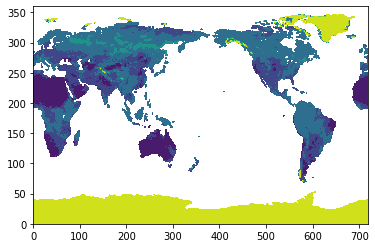

In [61]:
soilmvar = gfs.variables['Volumetric_Soil_Moisture_Content_depth_below_surface_layer']
# flip the data in latitude so North Hemisphere is up on the plot
soilm = soilmvar[0,0,::-1,:] 
print('shape=%s, type=%s, missing_value=%s' % \
      (soilm.shape, type(soilm), soilmvar.missing_value))
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(soilm)

### 处理日期时间

时间变量通常是和一个固定时间之间的差值来设置。

In [62]:
from netCDF4 import num2date, date2num, date2index
timedim = sfctmp.dimensions[0] # time dim name
print('name of time dimension = %s' % timedim)
times = gfs.variables[timedim] # time coord var
print('units = %s, values = %s' % (times.units, times[:]))
dates = num2date(times[:], times.units)
print([date.strftime('%Y-%m-%d %H:%M:%S') for date in dates[:10]]) # print only first ten...

name of time dimension = time2
units = Hour since 2019-11-25T00:00:00Z, values = [  0.   3.   6.   9.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.
  42.  45.  48.  51.  54.  57.  60.  63.  66.  69.  72.  75.  78.  81.
  84.  87.  90.  93.  96.  99. 102. 105. 108. 111. 114. 117. 120. 123.
 126. 129. 132. 135. 138. 141. 144. 147. 150. 153. 156. 159. 162. 165.
 168. 171. 174. 177. 180. 183. 186. 189. 192. 195. 198. 201. 204. 207.
 210. 213. 216. 219. 225. 228. 231. 234. 237. 240. 243. 246. 249. 252.
 255. 258. 261. 264. 267. 270. 273. 276. 279. 282. 285. 288. 291. 294.
 297. 303. 306. 309. 312. 315. 318. 321. 324. 327. 330. 333. 336. 339.
 342. 345. 348. 351. 354. 357. 360. 363. 366. 369. 372. 375. 378. 381.
 384.]
['2019-11-25 00:00:00', '2019-11-25 03:00:00', '2019-11-25 06:00:00', '2019-11-25 09:00:00', '2019-11-25 12:00:00', '2019-11-25 15:00:00', '2019-11-25 18:00:00', '2019-11-25 21:00:00', '2019-11-26 00:00:00', '2019-11-26 03:00:00']


In [63]:
from datetime import datetime, timedelta
date = datetime.now() + timedelta(days=3)
print(date)
ntime = date2index(date,times,select='nearest')
print('index = %s, date = %s' % (ntime, dates[ntime]))

lats, lons = gfs.variables['lat'][:], gfs.variables['lon'][:]
# lats, lons are 1-d. Make them 2-d using numpy.meshgrid.
lons, lats = np.meshgrid(lons,lats)
j, i = getclosest_ij(lats,lons,40,-105)
fcst_temp = sfctmp[ntime,j,i]
print('Boulder forecast valid at %s UTC = %5.1f %s' % \
      (dates[ntime],fcst_temp,sfctmp.units))

2019-11-28 00:23:38.918680
index = 24, date = 2019-11-28 00:00:00
Boulder forecast valid at 2019-11-28 00:00:00 UTC = 287.8 K


### 多文件聚合

如果有多个netcdf文件，每年都有一个文件，这是很常见的，如果想访问所有数据，要怎么做。MFDataset uses file globbing to patch together all the files into one big Dataset. You can also pass it a list of specific files.

不过缺点是有点慢。

In [64]:
!ls -l data/prmsl*nc

-rw-rw-r-- 1 owen owen 8985332 Nov 24 21:25 data/prmsl.2000.nc
-rw-rw-r-- 1 owen owen 8968789 Nov 24 21:25 data/prmsl.2001.nc
-rw-rw-r-- 1 owen owen 8972796 Nov 24 21:25 data/prmsl.2002.nc
-rw-rw-r-- 1 owen owen 8974435 Nov 24 21:25 data/prmsl.2003.nc
-rw-rw-r-- 1 owen owen 8997438 Nov 24 21:25 data/prmsl.2004.nc
-rw-rw-r-- 1 owen owen 8976678 Nov 24 21:25 data/prmsl.2005.nc
-rw-rw-r-- 1 owen owen 8969714 Nov 24 21:26 data/prmsl.2006.nc
-rw-rw-r-- 1 owen owen 8974360 Nov 24 21:26 data/prmsl.2007.nc
-rw-rw-r-- 1 owen owen 8994260 Nov 24 21:26 data/prmsl.2008.nc
-rw-rw-r-- 1 owen owen 8974678 Nov 24 21:26 data/prmsl.2009.nc
-rw-rw-r-- 1 owen owen 8970732 Nov 24 21:26 data/prmsl.2010.nc
-rw-rw-r-- 1 owen owen 8976285 Nov 24 21:26 data/prmsl.2011.nc


In [65]:
mf = netCDF4.MFDataset('data/prmsl*nc')
times = mf.variables['time']
dates = num2date(times[:],times.units)
print('starting date = %s' % dates[0])
print('ending date = %s'% dates[-1])
prmsl = mf.variables['prmsl']
print('times shape = %s' % times.shape)
print('prmsl dimensions = %s, prmsl shape = %s' %\
     (prmsl.dimensions, prmsl.shape))

starting date = 2000-01-01 00:00:00
ending date = 2011-12-31 00:00:00
times shape = 4383
prmsl dimensions = ('time', 'lat', 'lon'), prmsl shape = (4383, 91, 180)


In [66]:
f.close()
gfs.close()

以上就是python读取netcdf文件的介绍，接下来是关于写的部分（暂时没用到，暂不记录）。